In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

n = 25

# Static system

In [2]:
np.random.seed(88)
x = np.array([100]*n) # actual states
y = x + np.random.randn(n) # measurements
x_pred = np.zeros(len(x)) # predicted (extrapolated) states
x_filt = np.zeros(len(x)) # estimated (filtered) states

for t in range(len(x)):
    if t==0:
        x_filt[t] = y[t] # initial guess = first measurement
        x_pred[t] = x_filt[t]
    else:
        x_pred[t] = x_filt[t-1] # extrapolate current state from previous estimate
        x_filt[t] = x_pred[t] + 1/(t+1) * (y[t] - x_pred[t]) # estimate current state

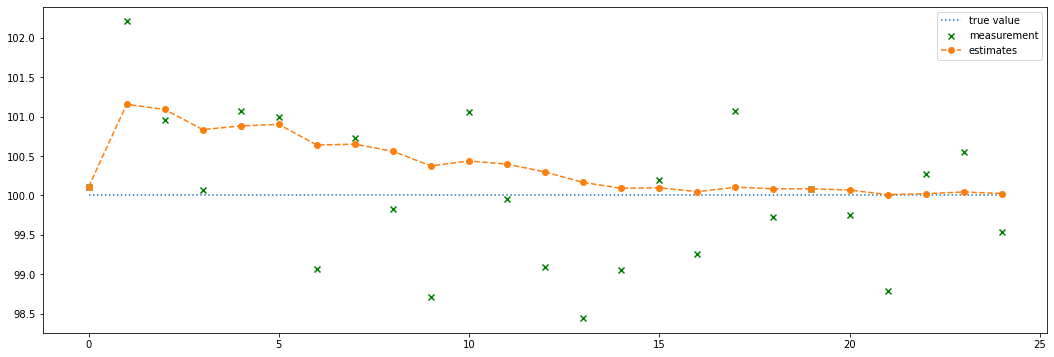

In [3]:
plt.figure(figsize=(18,6))
plt.plot(np.arange(n), x, label='true value', linestyle='dotted')
plt.scatter(np.arange(n), y, label='measurement', marker='x', c='g')
plt.plot(np.arange(n), x_filt, label='estimates', marker='o', linestyle='dashed')
plt.legend()

In [4]:
data = {'$x_t$':x, '$y_t$':y, '$\hat{x}_{t|t-1}$':x_pred, '$\hat{x}_{t|t}$':x_filt}
pd.DataFrame.from_dict(data).head(12).T

,0,1,2,3,4,5,6,7,8,9,10,11
$x_t$,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
$y_t$,100.106884,102.205815,100.956563,100.068411,101.068514,100.997183,99.068452,100.730430,99.828786,98.711309,101.061436,99.959499
$\hat{x}_{t|t-1}$,100.106884,100.106884,101.156350,101.089754,100.834418,100.881237,100.900562,100.638832,100.650282,100.559004,100.374235,100.436708
$\hat{x}_{t|t}$,100.106884,101.156350,101.089754,100.834418,100.881237,100.900562,100.638832,100.650282,100.559004,100.374235,100.436708,100.396940


# Dynamic system (known growth rate)

In [5]:
np.random.seed(88)
x = np.arange(100,100+n) # actual states
y = x + np.random.randn(n) # measurements
x_pred = np.zeros(len(x)) # predicted (extrapolated) states
x_filt = np.zeros(len(x)) # estimated (filtered) states
g = 0.1

growth_rate = 1

for t in range(len(x)):
    if t==0:
        x_filt[t] = y[t] # initial guess = first measurement
        x_pred[t] = x_filt[t]
    else:
        x_pred[t] = x_filt[t-1] + growth_rate # extrapolate current state from previous estimate
        x_filt[t] = x_pred[t] + g*(y[t] - x_pred[t]) # estimate current state

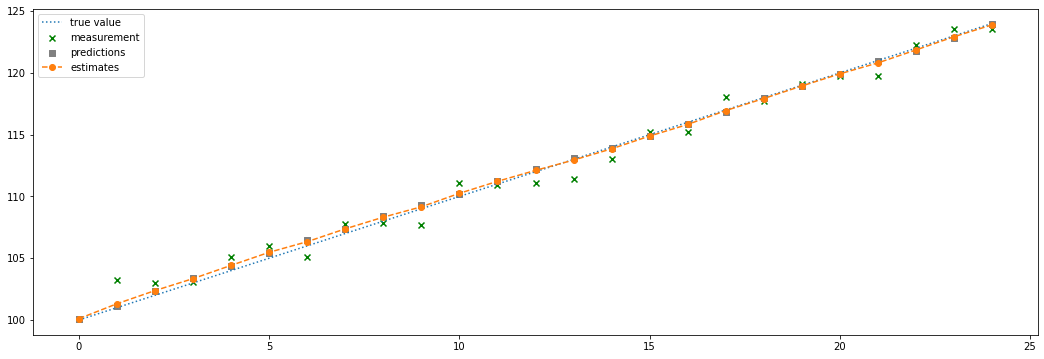

In [6]:
plt.figure(figsize=(18,6))
plt.plot(np.arange(n), x, label='true value', linestyle='dotted')
plt.scatter(np.arange(n), y, label='measurement', marker='x', c='g')
plt.scatter(np.arange(n), x_pred, label='predictions', marker='s', c='grey')
plt.plot(np.arange(n), x_filt, label='estimates', marker='o', linestyle='dashed')
plt.legend()

In [7]:
data = {'$x_t$':x, '$y_t$':y, '$\hat{x}_{t|t-1}$':x_pred, '$\hat{x}_{t|t}$':x_filt}
pd.DataFrame.from_dict(data).head(12).T

,0,1,2,3,4,5,6,7,8,9,10,11
$x_t$,100.000000,101.000000,102.000000,103.000000,104.000000,105.000000,106.000000,107.000000,108.000000,109.000000,110.000000,111.000000
$y_t$,100.106884,103.205815,102.956563,103.068411,105.068514,105.997183,105.068452,107.730430,107.828786,107.711309,111.061436,110.959499
$\hat{x}_{t|t-1}$,100.106884,101.106884,102.316777,103.380756,104.349521,105.421421,106.478997,107.337942,108.377191,109.322351,110.161247,111.251265
$\hat{x}_{t|t}$,100.106884,101.316777,102.380756,103.349521,104.421421,105.478997,106.337942,107.377191,108.322351,109.161247,110.251265,111.222089


# Dynamic system (wrong assumption about growth rate)

In [8]:
np.random.seed(88)
x = np.arange(100,100+n) # actual states
y = x + np.random.randn(n) # measurements
x_pred = np.zeros(len(x)) # predicted (extrapolated) states
x_filt = np.zeros(len(x)) # estimated (filtered) states
g = 0.1

growth_rate = -1

for t in range(len(x)):
    if t==0:
        x_filt[t] = y[t] # initial guess = first measurement
        x_pred[t] = x_filt[t]
    else:
        x_pred[t] = x_filt[t-1] + growth_rate # extrapolate current state
        x_filt[t] = x_pred[t] + g*(y[t] - x_pred[t])

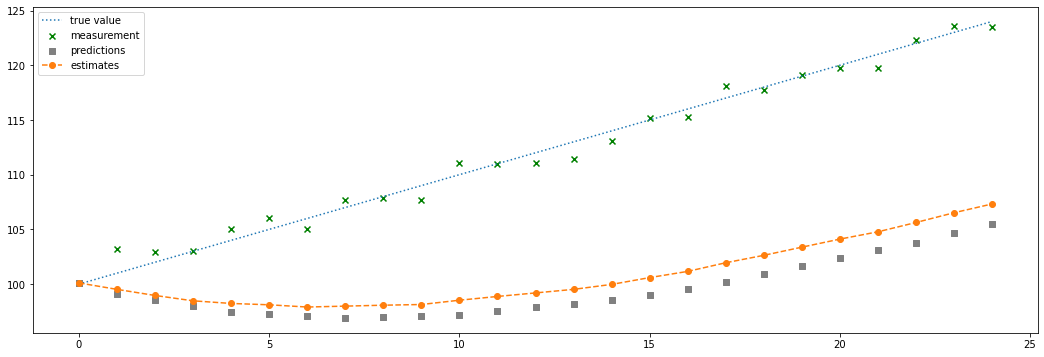

In [9]:
plt.figure(figsize=(18,6))
plt.plot(np.arange(n), x, label='true value', linestyle='dotted')
plt.scatter(np.arange(n), y, label='measurement', marker='x', c='g')
plt.scatter(np.arange(n), x_pred, label='predictions', marker='s', c='grey')
plt.plot(np.arange(n), x_filt, label='estimates', marker='o', linestyle='dashed')
plt.legend()

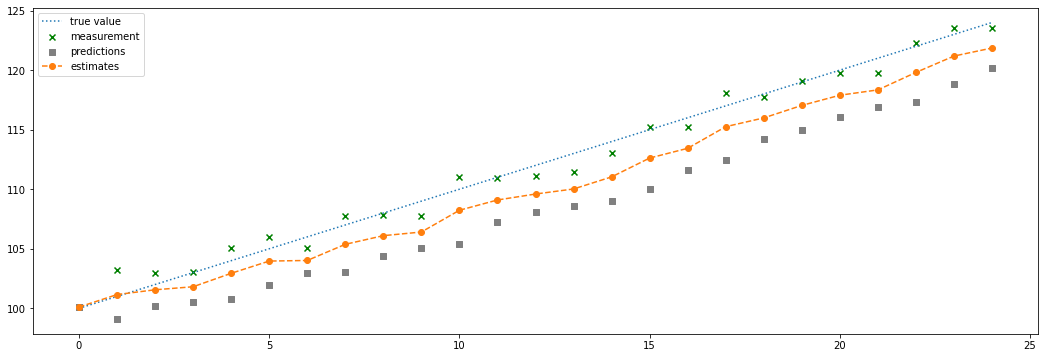

In [10]:
np.random.seed(88)
x = np.arange(100,100+n) # actual states
y = x + np.random.randn(n) # measurements
x_pred = np.zeros(len(x)) # predicted (extrapolated) states
x_filt = np.zeros(len(x)) # estimated (filtered) states
g = 0.5

growth_rate = -1

for t in range(len(x)):
    if t==0:
        x_filt[t] = y[t] # initial guess = first measurement
        x_pred[t] = x_filt[t]
    else:
        x_pred[t] = x_filt[t-1] + growth_rate # extrapolate current state
        x_filt[t] = x_pred[t] + g*(y[t] - x_pred[t])
        
plt.figure(figsize=(18,6))
plt.plot(np.arange(n), x, label='true value', linestyle='dotted')
plt.scatter(np.arange(n), y, label='measurement', marker='x', c='g')
plt.scatter(np.arange(n), x_pred, label='predictions', marker='s', c='grey')
plt.plot(np.arange(n), x_filt, label='estimates', marker='o', linestyle='dashed')
plt.legend()

# Dynamic system (unknown, but constant growth rate)

In [11]:
np.random.seed(88)
x = np.arange(100,100+n) # actual states
y = x + np.random.randn(n) # measurements
dx = np.zeros(len(x)) # estimated growth rates
x_pred = np.zeros(len(x)) # predicted (extrapolated) states
x_filt = np.zeros(len(x)) # estimated (filtered) states
g = 0.5
h = 0.5

for t in range(len(x)):
    if t==0:
        x_filt[t] = y[t] # initial guess = first measurement
        dx[t] = -1 # initial guess of growth rate
        x_pred[t] = x_filt[t]
    else:
        x_pred[t] = x_filt[t-1] + dx[t-1] # extrapolate current state
        dx[t] = dx[t-1] + h*(y[t] - x_pred[t]) # estimate growth rate
        x_filt[t] = x_pred[t] + g*(y[t] - x_pred[t]) # estimate current state

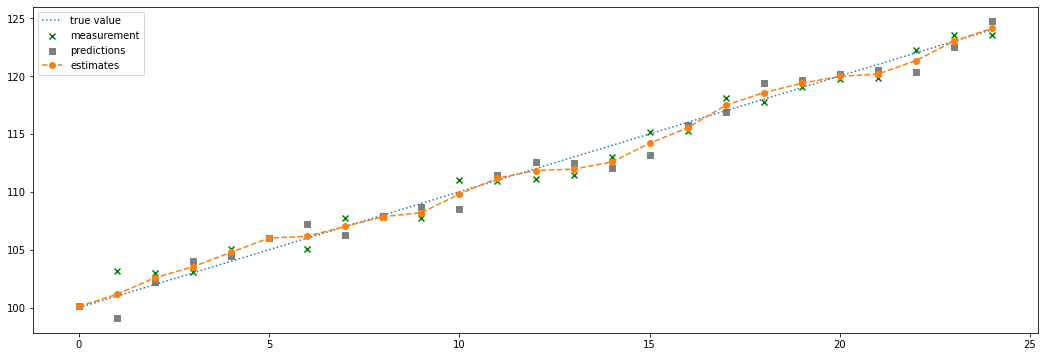

In [12]:
plt.figure(figsize=(18,6))
plt.plot(np.arange(n), x, label='true value', linestyle='dotted')
plt.scatter(np.arange(n), y, label='measurement', marker='x', c='g')
plt.scatter(np.arange(n), x_pred, label='predictions', marker='s', c='grey')
plt.plot(np.arange(n), x_filt, label='estimates', marker='o', linestyle='dashed')
plt.legend()

In [13]:
data = {'$x_t$':x, '$y_t$':y, '$\hat{\dot{x}}$':dx, '$\hat{x}_{t|t-1}$':x_pred, '$\hat{x}_{t|t}$':x_filt}
pd.DataFrame.from_dict(data).head(12).T

,0,1,2,3,4,5,6,7,8,9,10,11
$x_t$,100.000000,101.000000,102.000000,103.000000,104.000000,105.000000,106.000000,107.000000,108.000000,109.000000,110.000000,111.000000
$y_t$,100.106884,103.205815,102.956563,103.068411,105.068514,105.997183,105.068452,107.730430,107.828786,107.711309,111.061436,110.959499
$\hat{\dot{x}}$,-1.000000,1.049465,1.424839,0.956031,1.243662,1.229982,0.143785,0.859783,0.837069,0.348438,1.604968,1.379780
$\hat{x}_{t|t-1}$,100.106884,99.106884,102.205815,104.006028,104.493250,106.024544,107.240845,106.298434,107.874216,108.688570,108.548378,111.409874
$\hat{x}_{t|t}$,100.106884,101.156350,102.581189,103.537220,104.780882,106.010864,106.154649,107.014432,107.851501,108.199939,109.804907,111.184687


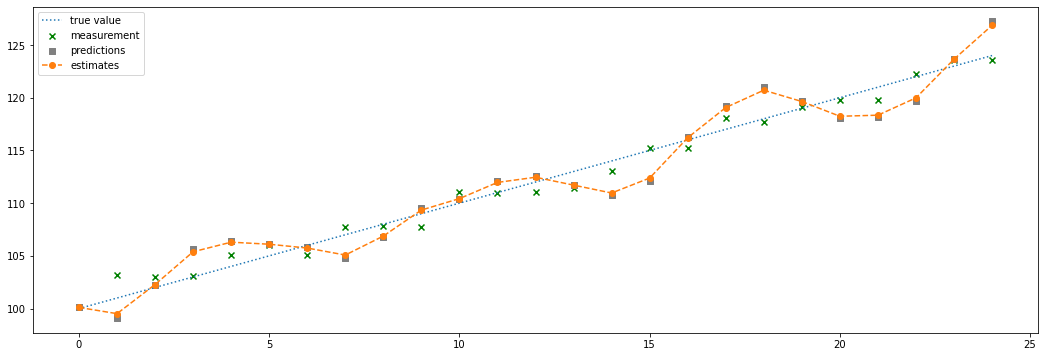

In [14]:
np.random.seed(88)
x = np.arange(100,100+n) # actual states
y = x + np.random.randn(n) # measurements
dx = np.zeros(len(x)) # estimated growth rates
x_pred = np.zeros(len(x)) # predicted (extrapolated) states
x_filt = np.zeros(len(x)) # estimated (filtered) states
g = 0.1
h = 0.9

for t in range(len(x)):
    if t==0:
        x_filt[t] = y[t] # initial guess = first measurement
        dx[t] = -1 # initial guess of growth rate
        x_pred[t] = x_filt[t]
    else:
        x_pred[t] = x_filt[t-1] + dx[t-1] # extrapolate current state
        dx[t] = dx[t-1] + h*(y[t] - x_pred[t]) # estimate growth rate
        x_filt[t] = x_pred[t] + g*(y[t] - x_pred[t]) # estimate current state
        
plt.figure(figsize=(18,6))
plt.plot(np.arange(n), x, label='true value', linestyle='dotted')
plt.scatter(np.arange(n), y, label='measurement', marker='x', c='g')
plt.scatter(np.arange(n), x_pred, label='predictions', marker='s', c='grey')
plt.plot(np.arange(n), x_filt, label='estimates', marker='o', linestyle='dashed')
plt.legend()

# Kalman filter in one dimension (static system)

In [15]:
np.random.seed(88)
x = np.array([100]*n) # actual states
r = 1 # measurement variance
y = x + np.random.randn(n)*np.sqrt(r) # measurements
p_pred = np.zeros(len(x)) # predicted (extrapolated) estimate variance
p = np.zeros(len(x)) # estimated (filtered) estimate variance
q = 0 # process noise variance
K = np.zeros(len(x)) # Kalman gain
x_pred = np.zeros(len(x)) # predicted (extrapolated) states
x_filt = np.zeros(len(x)) # estimated (filtered) states

# initial guess of state and estimate uncertainty
x_0 = y[0]
p_0 = 500

for t in range(len(x)):
    if t==0:
        x_pred[t] = x_0 # initial guess = first measurement
        p_pred[t] = p_0 # inital guess
        K[t] = p_pred[t] / (p_pred[t] + r)
        p[t] = (1 - K[t]) * p_pred[t]
        x_filt[t] = x_pred[t] + K[t]*(y[t] - x_pred[t])
    else:
        x_pred[t] = x_filt[t-1] # state extrapolation
        p_pred[t] = p[t-1] + q # covariance extrapolation
        K[t] = p_pred[t] / (p_pred[t] + r) # Kalman gain
        x_filt[t] = x_pred[t] + K[t]*(y[t] - x_pred[t]) # state estimation
        p[t] = (1 - K[t]) * p_pred[t] # covariance estimation

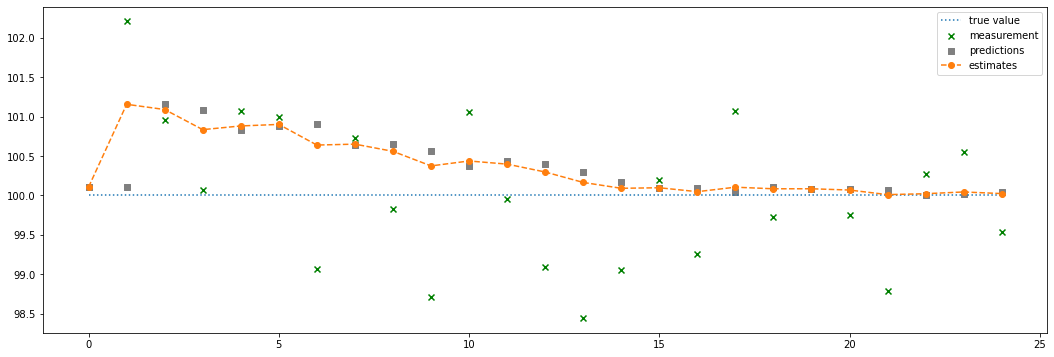

In [16]:
plt.figure(figsize=(18,6))
plt.plot(np.arange(n), x, label='true value', linestyle='dotted')
plt.scatter(np.arange(n), y, label='measurement', marker='x', c='g')
plt.scatter(np.arange(n), x_pred, label='predictions', marker='s', c='grey')
plt.plot(np.arange(n), x_filt, label='estimates', marker='o', linestyle='dashed')
plt.legend()

In [17]:
data = {'$x_t$':x, '$y_t$':y, '$\hat{x}_{t|t-1}$':x_pred, '$\hat{x}_{t|t}$':x_filt, 
        '$p_{t|t-1}$':p_pred, '$p_{t|t}$':p, '$K_t$':K}
pd.DataFrame.from_dict(data).head(12).T

,0,1,2,3,4,5,6,7,8,9,10,11
$x_t$,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
$y_t$,100.106884,102.205815,100.956563,100.068411,101.068514,100.997183,99.068452,100.730430,99.828786,98.711309,101.061436,99.959499
$\hat{x}_{t|t-1}$,100.106884,100.106884,101.155301,101.089099,100.834055,100.880928,100.900297,100.638680,100.650146,100.558904,100.374181,100.436648
$\hat{x}_{t|t}$,100.106884,101.155301,101.089099,100.834055,100.880928,100.900297,100.638680,100.650146,100.558904,100.374181,100.436648,100.396892
$p_{t|t-1}$,500.000000,0.998004,0.499500,0.333111,0.249875,0.199920,0.166611,0.142816,0.124969,0.111086,0.099980,0.090893
$p_{t|t}$,0.998004,0.499500,0.333111,0.249875,0.199920,0.166611,0.142816,0.124969,0.111086,0.099980,0.090893,0.083319
$K_t$,0.998004,0.499500,0.333111,0.249875,0.199920,0.166611,0.142816,0.124969,0.111086,0.099980,0.090893,0.083319


# Kalman filter in one dimension (dynamic system)

In [18]:
np.random.seed(88)
x = np.arange(100,100+n) # actual states
r = 1 # measurement variance
y = x + np.random.randn(n)*np.sqrt(r) # measurements
p_pred = np.zeros(len(x)) # predicted (extrapolated) estimate variance
p = np.zeros(len(x)) # estimated (filtered) estimate variance
q = 1 # process noise variance
K = np.zeros(len(x)) # Kalman gain
x_pred = np.zeros(len(x)) # predicted (extrapolated) states
x_filt = np.zeros(len(x)) # estimated (filtered) states

# initial guess of state and estimate uncertainty
x_0 = y[0]
p_0 = 500

for t in range(len(x)):
    if t==0:
        x_pred[t] = x_0 
        p_pred[t] = p_0
        K[t] = p_pred[t] / (p_pred[t] + r)
        p[t] = (1 - K[t]) * p_pred[t]
        x_filt[t] = x_pred[t] + K[t]*(y[t] - x_pred[t])
    else:
        x_pred[t] = x_filt[t-1] # state extrapolation
        p_pred[t] = p[t-1] + q # covariance extrapolation
        K[t] = p_pred[t] / (p_pred[t] + r) # Kalman gain
        x_filt[t] = x_pred[t] + K[t]*(y[t] - x_pred[t]) # state estimation
        p[t] = (1 - K[t]) * p_pred[t] # covariance estimation

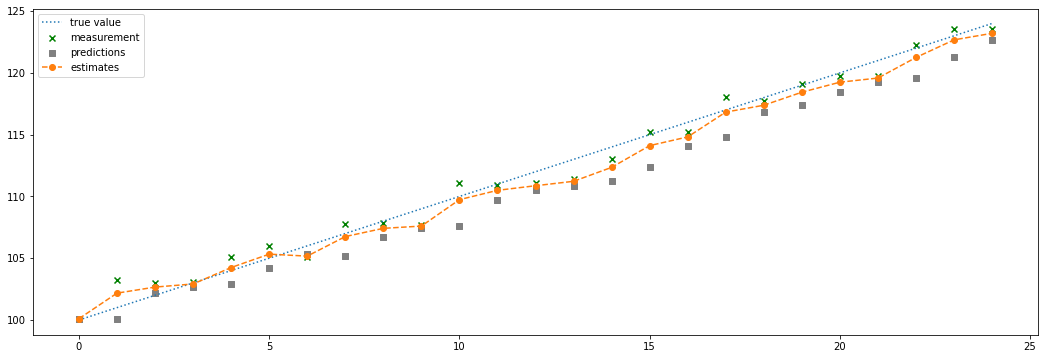

In [19]:
plt.figure(figsize=(18,6))
plt.plot(np.arange(n), x, label='true value', linestyle='dotted')
plt.scatter(np.arange(n), y, label='measurement', marker='x', c='g')
plt.scatter(np.arange(n), x_pred, label='predictions', marker='s', c='grey')
plt.plot(np.arange(n), x_filt, label='estimates', marker='o', linestyle='dashed')
plt.legend()

In [20]:
data = {'$x_t$':x, '$y_t$':y, '$\hat{x}_{t|t-1}$':x_pred, '$\hat{x}_{t|t}$':x_filt, 
        '$p_{t|t-1}$':p_pred, '$p_{t|t}$':p, '$K_t$':K}
pd.DataFrame.from_dict(data).head(12).T

,0,1,2,3,4,5,6,7,8,9,10,11
$x_t$,100.000000,101.000000,102.000000,103.000000,104.000000,105.000000,106.000000,107.000000,108.000000,109.000000,110.000000,111.000000
$y_t$,100.106884,103.205815,102.956563,103.068411,105.068514,105.997183,105.068452,107.730430,107.828786,107.711309,111.061436,110.959499
$\hat{x}_{t|t-1}$,100.106884,100.106884,102.172151,102.662384,102.913732,104.245778,105.328243,105.167683,106.751549,107.417318,107.599014,109.738909
$\hat{x}_{t|t}$,100.106884,102.172151,102.662384,102.913732,104.245778,105.328243,105.167683,106.751549,107.417318,107.599014,109.738909,110.493275
$p_{t|t-1}$,500.000000,1.998004,1.666445,1.624969,1.619043,1.618181,1.618055,1.618037,1.618034,1.618034,1.618034,1.618034
$p_{t|t}$,0.998004,0.666445,0.624969,0.619043,0.618181,0.618055,0.618037,0.618034,0.618034,0.618034,0.618034,0.618034
$K_t$,0.998004,0.666445,0.624969,0.619043,0.618181,0.618055,0.618037,0.618034,0.618034,0.618034,0.618034,0.618034


# Kalman filter in one dimension (dynamic system, nonlinear growth)

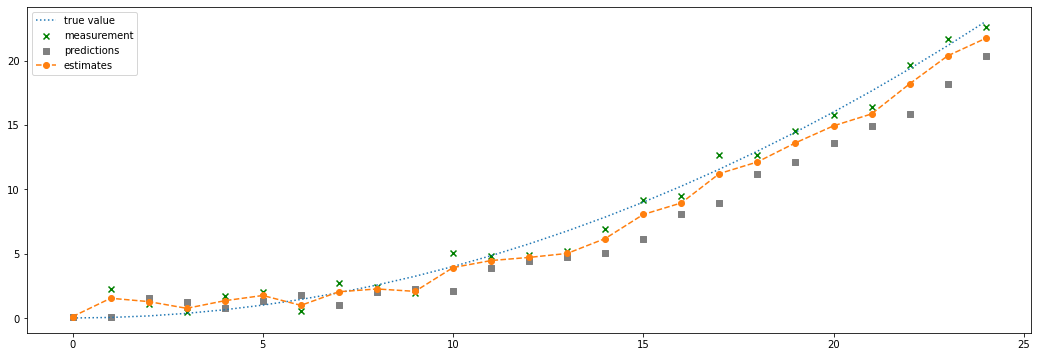

In [21]:
np.random.seed(88)
x = (np.arange(0,n)*0.2)**(2) # actual states
r = 1 # measurement variance
y = x + np.random.randn(n)*np.sqrt(r) # measurements
p_pred = np.zeros(len(x)) # predicted (extrapolated) estimate variance
p = np.zeros(len(x)) # estimated (filtered) estimate variance
q = 1 # process noise variance
K = np.zeros(len(x)) # Kalman gain
x_pred = np.zeros(len(x)) # predicted (extrapolated) states
x_filt = np.zeros(len(x)) # estimated (filtered) states

# initial guess of state and estimate uncertainty
x_0 = y[0]
p_0 = 500

for t in range(len(x)):
    if t==0:
        x_pred[t] = x_0 
        p_pred[t] = p_0
        K[t] = p_pred[t] / (p_pred[t] + r)
        p[t] = (1 - K[t]) * p_pred[t]
        x_filt[t] = x_pred[t] + K[t]*(y[t] - x_pred[t])
    else:
        x_pred[t] = x_filt[t-1] # state extrapolation
        p_pred[t] = p[t-1] + q # covariance extrapolation
        K[t] = p_pred[t] / (p_pred[t] + r) # Kalman gain
        x_filt[t] = x_pred[t] + K[t]*(y[t] - x_pred[t]) # state estimation
        p[t] = (1 - K[t]) * p_pred[t] # covariance estimation
        
plt.figure(figsize=(18,6))
plt.plot(np.arange(n), x, label='true value', linestyle='dotted')
plt.scatter(np.arange(n), y, label='measurement', marker='x', c='g')
plt.scatter(np.arange(n), x_pred, label='predictions', marker='s', c='grey')
plt.plot(np.arange(n), x_filt, label='estimates', marker='o', linestyle='dashed')
plt.legend()

# Kalman filter in multiple dimensions

In [22]:
n = 25

In [23]:
np.random.seed(88)
X = np.vstack([[np.arange(100,100+n)],[np.array([1]*n)]]) # actual states
R = np.array([[1]]) # measurement covariance matrix
Y = X[0,:] + np.random.randn(n)*np.sqrt(R[0,0])
P_pred = np.zeros((n,X.shape[0],X.shape[0]))
P = np.zeros((n,X.shape[0],X.shape[0]))
K = np.zeros((n,2,1))
X_pred = np.zeros(X.shape)
X_filt = np.zeros(X.shape)
H = np.array([[1,0]]) # observation matrix
F = np.array([[1,1],[0,1]]) # state transition matrix
Q = np.array([[0,0],[0,0]]) # process noise matrix (for simplicity I assume that our model is perfect)

# initial guess of state and estimate uncertainty
X_0 = np.hstack([Y[0],[-1]])
P_0 = np.array([[500,0],[0,500]])

In [24]:
for t in range(X.shape[1]):
    if t==0:
        X_pred[:,t] = F @ X_0 # state extrapolation
        P_pred[t,:] = F @ P_0 @ F.T + Q # covariance extrapolation
        K[t,:] = P_pred[t,:] @ H.T @ np.linalg.inv(H @ P_pred[t,:] @ H.T + R) # calculate Kalman gain
        X_filt[:,t] = X_pred[:,t] + K[t,:] @ (Y[t] - H @ X_pred[:,t]) # update estimate
        P[t,:] = ((np.eye(2) - K[t,:] @ H) @ P_pred[t,:] @ 
                  (np.eye(2) - K[t,:] @ H).T + K[t,:] @ R @ K[t,:].T) # update estimate uncertainty
    else:    
        X_pred[:,t] = F @ X_filt[:,t-1] # state extrapolation 
        P_pred[t,:] = F @ P[t-1,:] @ F.T + Q # covariance extrapolation
        K[t,:] = P_pred[t,:] @ H.T @ np.linalg.inv(H @ P_pred[t,:] @ H.T + R) # calculate Kalman gain
        X_filt[:,t] = X_pred[:,t] + K[t,:] @ (Y[t] - H @ X_pred[:,t]) # update state estimate
        P[t,:] = ((np.eye(2) - K[t,:] @ H) @ P_pred[t,:] @ 
                  (np.eye(2) - K[t,:] @ H).T + K[t,:] @ R @ K[t,:].T) # update estimate uncertainty

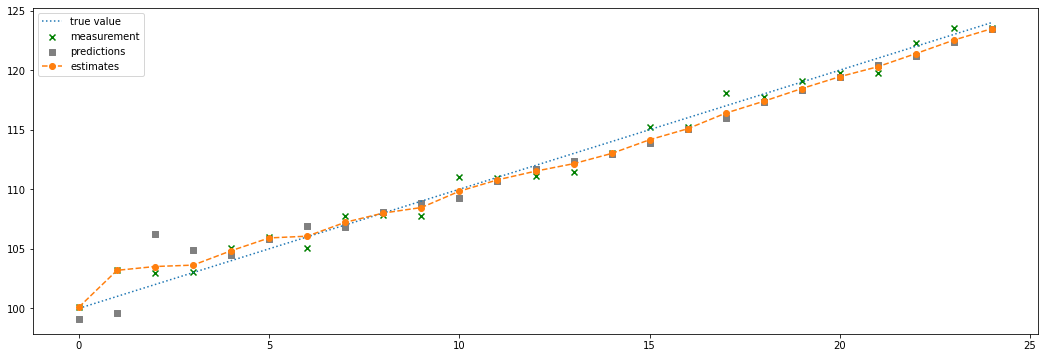

In [25]:
plt.figure(figsize=(18,6))
plt.plot(np.arange(n), X[0,:], label='true value', linestyle='dotted')
plt.scatter(np.arange(n), Y, label='measurement', marker='x', c='g')
plt.scatter(np.arange(n), X_pred[0,:], label='predictions', marker='s', c='grey')
plt.plot(np.arange(n), X_filt[0,:], label='estimates', marker='o', linestyle='dashed')
plt.legend()

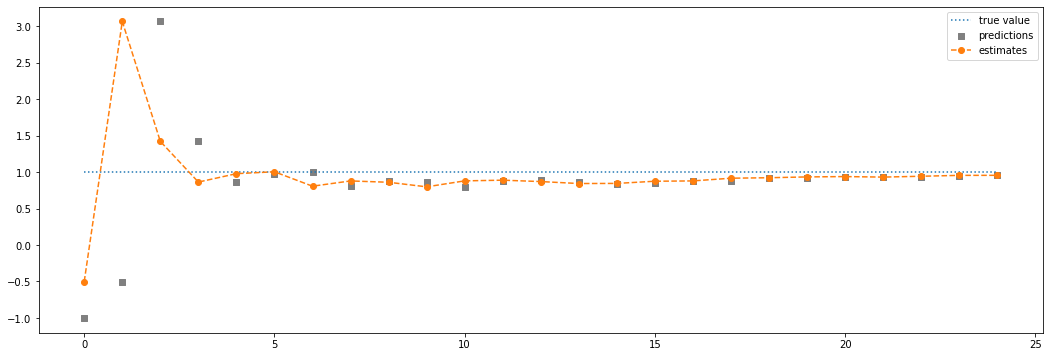

In [26]:
plt.figure(figsize=(18,6))
plt.plot(np.arange(n), X[1,:], label='true value', linestyle='dotted')
plt.scatter(np.arange(n), X_pred[1,:], label='predictions', marker='s', c='grey')
plt.plot(np.arange(n), X_filt[1,:], label='estimates', marker='o', linestyle='dashed')
plt.legend()

# FilterPy implementation (multiple dimensions)

In [27]:
from filterpy.kalman import KalmanFilter

f = KalmanFilter(dim_x=2, dim_z=1)
f.x = X_0
f.F = F
f.H = H
f.P = P_0 
f.R = R
f.Q = Q

In [28]:
for y in Y:
    f.predict()
    f.update(y)
    print(f.x)

[100.1058853  -0.5004995]
[103.19159822   3.06440868]
[103.51102862   1.42070257]
[103.62867015   0.86285799]
[104.83748928   0.97809395]
[105.91065905   1.00400959]
[106.05783998   0.80636528]
[107.22501228   0.87850093]
[107.99975704   0.86019658]
[108.46324768   0.79757535]
[109.83361893   0.87938422]
[110.78567333   0.88886095]
[111.51570143   0.86980462]
[112.14392444   0.84296687]
[113.00186653   0.84451579]
[114.15500378   0.87437797]
[115.07753583   0.87875501]
[116.38847514   0.9157946 ]
[117.38579784   0.92240419]
[118.45273787   0.93352106]
[119.45024071   0.93820215]
[120.28639443   0.93108322]
[121.39025407   0.94260053]
[122.52387119   0.95479194]
[123.48674279   0.95528657]


In [29]:
X_filt

array([[100.1058853 , 103.19159822, 103.51102862, 103.62867015,
        104.83748928, 105.91065905, 106.05783998, 107.22501228,
        107.99975704, 108.46324768, 109.83361893, 110.78567333,
        111.51570143, 112.14392444, 113.00186653, 114.15500378,
        115.07753583, 116.38847514, 117.38579784, 118.45273787,
        119.45024071, 120.28639443, 121.39025407, 122.52387119,
        123.48674279],
       [ -0.5004995 ,   3.06440868,   1.42070257,   0.86285799,
          0.97809395,   1.00400959,   0.80636528,   0.87850093,
          0.86019658,   0.79757535,   0.87938422,   0.88886095,
          0.86980462,   0.84296687,   0.84451579,   0.87437797,
          0.87875501,   0.9157946 ,   0.92240419,   0.93352106,
          0.93820215,   0.93108322,   0.94260053,   0.95479194,
          0.95528657]])

# FilterPy implementation (one dimension)

<span style='color:red'>
* I don't know why, but similar implementation as for multiple dimensions doesn't work (estimates are not updated) *
</span>

In [30]:
np.random.seed(88)
x = np.arange(100,100+n) # actual states
r = 1 # measurement variance
y = x + np.random.randn(n)*np.sqrt(r) # measurements
p_pred = np.zeros(len(x)) # predicted (extrapolated) estimate variance
p = np.zeros(len(x)) # estimated (filtered) estimate variance
q = 1 # process noise variance
K = np.zeros(len(x)) # Kalman gain
x_pred = np.zeros(len(x)) # predicted (extrapolated) states
x_filt = np.zeros(len(x)) # estimated (filtered) states

# initial guess of state and estimate uncertainty
x_0 = y[0]
p_0 = 500

In [31]:
import filterpy.kalman as kf

for t in range(len(y)):
    if t==0:
        x,P = kf.predict(x=x_0, P=p_0, Q=q)
        x,P = kf.update(x=x, P=P, z=y[t], R=r)
        print(x)
    else:
        x,P = kf.predict(x=x, P=P, Q=q)
        x,P = kf.update(x=x, P=P, z=y[t], R=r)
        print(x)

100.10688430415176
102.17215189936917
102.66238421221641
102.91373235525302
104.24577765584273
105.32824306893477
105.16768259681675
106.75154907226712
107.41731836983966
107.59901446311012
109.73890862191566
110.49327478748728
110.8659516304255
111.22435902109893
112.35196706511137
114.11247323569735
114.81715422438377
116.82633737384549
117.3804906541782
118.43489789446184
119.24568512348446
119.58082880728205
121.24732284618275
122.67182706341991
123.20360218864919


# Smoothing

In [32]:
np.random.seed(88)
X = np.vstack([[np.arange(100,100+n)],[np.array([1]*n)]]) # actual states
R = np.array([[1]]) # measurement covariance matrix
Y = X[0,:] + np.random.randn(n)*np.sqrt(R[0,0])
P_pred = np.zeros((n,X.shape[0],X.shape[0]))
P = np.zeros((n,X.shape[0],X.shape[0]))
K = np.zeros((n,2,1))
X_pred = np.zeros(X.shape)
X_filt = np.zeros(X.shape)
H = np.array([[1,0]]) # observation matrix
F = np.array([[1,1],[0,1]]) # state transition matrix
Q = np.array([[0,0],[0,0]]) # process noise matrix (for simplicity I assume that our model is perfect)

# initial guess of state and estimate uncertainty
X_0 = np.hstack([Y[0],[-1]])
P_0 = np.array([[500,0],[0,500]])

In [33]:
f = KalmanFilter(dim_x=2, dim_z=1)
f.x = X_0
f.F = F
f.H = H
f.P = P_0 
f.R = R
f.Q = Q

In [34]:
mu,cov,_,_ = f.batch_filter(Y) # filtering

In [35]:
M, P, C, _ = f.rts_smoother(mu, cov) # smoothing

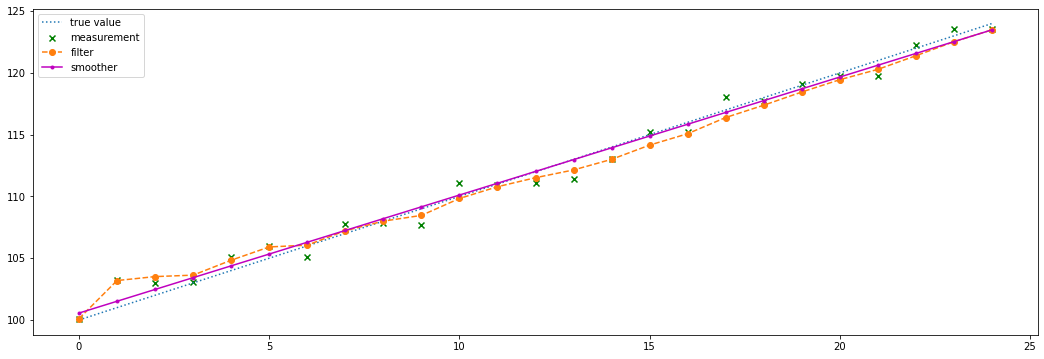

In [36]:
plt.figure(figsize=(18,6))
plt.plot(np.arange(n), X[0,:], label='true value', linestyle='dotted')
plt.scatter(np.arange(n), Y, label='measurement', marker='x', c='g')
plt.plot(np.arange(n), mu[:,0], label='filter', marker='o', linestyle='dashed')
plt.plot(np.arange(n), M[:,0], label='smoother', marker='.', c='m')
plt.legend()



# Examples from finance

In [37]:
Y = np.genfromtxt('aa-3rv.txt')[:,1]

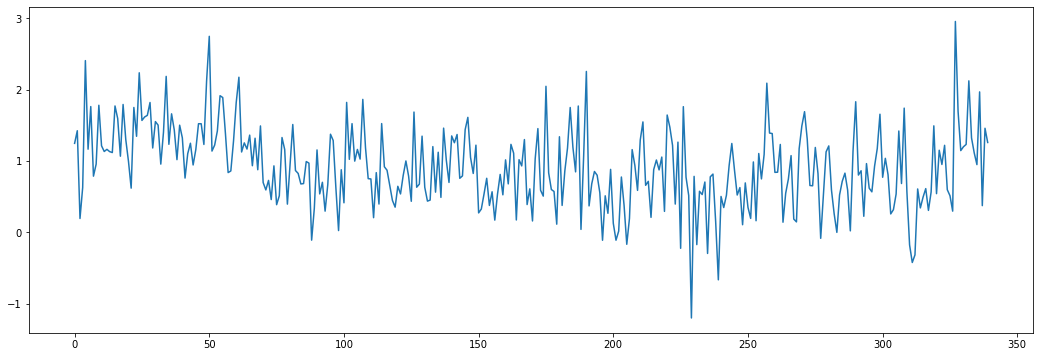

In [38]:
plt.figure(figsize=(18,6))
plt.plot(np.arange(len(Y)), np.log(Y))

In [39]:
R = np.array([[10]]) # measurement covariance matrix
Y = np.log(np.genfromtxt('aa-3rv.txt')[:,1]) # log of realized volatility
H = np.array([[1,0]]) # observartion matrix
F = np.array([[1,1],[0,1]]) # state transition matrix
Q = np.array([[1,0],[0,1]]) # process noise matrix


# initial guess of state and estimate uncertainty
X_0 = np.hstack([[0],[0]])
P_0 = np.array([[1000,0],[0,1000]])

In [40]:
f = KalmanFilter(dim_x=2, dim_z=1)
f.x = X_0
f.F = F
f.H = H
f.P = P_0 
f.R = R
f.Q = Q

In [41]:
mu,cov,_,_ = f.batch_filter(Y) # filtering

In [42]:
M, P, C, _ = f.rts_smoother(mu, cov) # smoothing

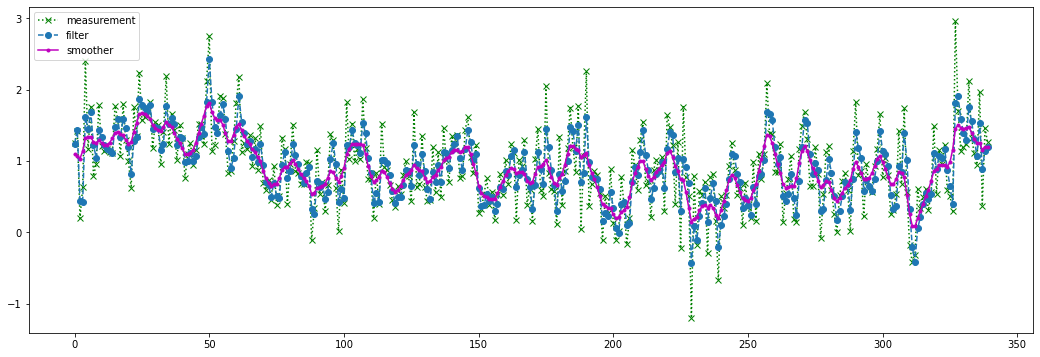

In [43]:
plt.figure(figsize=(18,6))
plt.plot(np.arange(len(Y)), Y, label='measurement', marker='x', c='g', linestyle='dotted')
plt.plot(np.arange(len(Y)), mu[:,0], label='filter', marker='o', linestyle='dashed')
plt.plot(np.arange(len(Y)), M[:,0], label='smoother', marker='.', c='m')
plt.legend()

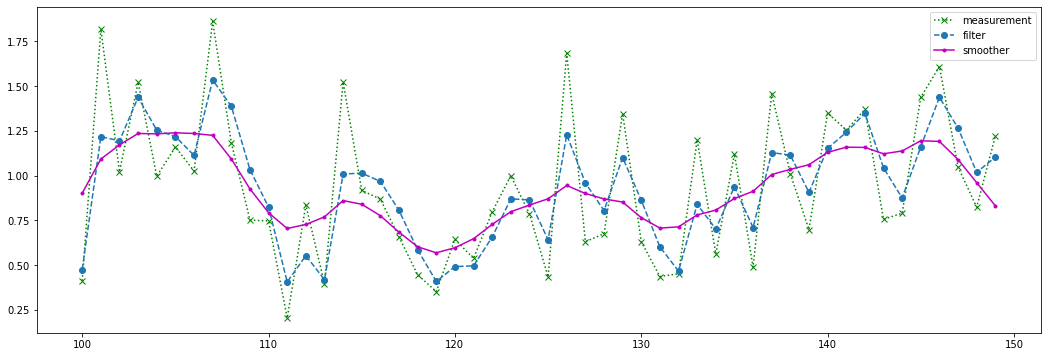

In [44]:
plt.figure(figsize=(18,6))
plt.plot(np.arange(len(Y))[100:150], Y[100:150], label='measurement', marker='x', c='g', linestyle='dotted')
plt.plot(np.arange(len(Y))[100:150], mu[:,0][100:150], label='filter', marker='o', linestyle='dashed')
plt.plot(np.arange(len(Y))[100:150], M[:,0][100:150], label='smoother', marker='.', c='m')
plt.legend()